## Proyecto 4 - Informe Final
### Análisis de Mercado Inmobiliario

https://github.com/amorgado13/acamica-final-project.git

En este proyecto se realizará un análisis y predicción de los precios de los inmuebles publicados en el portal Properti de la ciudad de Buenos Aires, Argentina. El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto de la entrega 1 y 2. 

El trabajo se organiza en tres partes:

##### PARTE A - Transformación de datos

##### PARTE B - Análisis Exploratorio de datos (EDA)

##### PARTE C - Interpretación de los modelos 

* Importar las librerías necesarias para trabajar en la consigna.

In [164]:
#Importación de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Carga del dataset

In [165]:
# Se realiza la carga del dataset con pandas
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [166]:
#Visualización de las primeras 3 lineas de datos
data.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [167]:
# Obtención de las filas y columnas del Dataset
print(f'Filas y columnas: {data.shape}')

Filas y columnas: (146660, 19)


In [168]:
#Visualizar los datos de cada columna
print(f'Tipos de propiedad: {data.property_type.unique()}')
print(f'Tipos de operación: {data.operation_type.unique()}')
print(f'Tipos de moneda: {data.currency.unique()}')
print(f'Pais: {data.l1.unique()}')
print(f'Provincia: {data.l2.unique()}')
print(f'Ciudad/Barrio: {data.l3.unique()}')

Tipos de propiedad: ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
Tipos de operación: ['Venta']
Tipos de moneda: ['USD']
Pais: ['Argentina']
Provincia: ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
Ciudad/Barrio: ['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' '

El dataset cuenta con 146660 instancias y 19 columnas con los siguientes datos:
* start_date: Fecha de alta.
* end_date: Fecha de baja.
* created_on: Fecha de creación.
* lat:	Latitud
* lon:	Longitud
* l1:	País
* l2:	Provincia
* l3:	Ciudad/Barrio
* Rooms: Cantidad de cuartos.
* bedrooms:	Cantidad de dormitorios.
* bathrooms: Cantidad de baños.
* surface_total:	Superficie total en m².
* surface_covered:	Superficie cubierta en m².
* price:	Precio del inmueble.
* currency:	Moneda del precio.
* title:	Título del anuncio.
* description:	Descripción del anuncio.
* property_type:	Tipo de propiedad.
* operation_type:	Tipo de operación.

Descripción de las columnas de acuerdo a la información extraida de de https://www.properati.com.ar/data/

## Parte A - Transformación de Datos

In [169]:
#Ver la información por columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [170]:
#Cantidad de valores faltantes por columna
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

* **Imputación de valores fatantes: KNN Imputer**

In [171]:
#Importar libreria
from sklearn.impute import KNNImputer

In [172]:
#Definir X
X = data[["lat","lon","surface_covered","surface_total", "bathrooms"]] 

In [175]:
#Definir imputer
imputer = KNNImputer(n_neighbors=2) 

In [176]:
#Fit transform de los datos
X = imputer.fit_transform(X) 

In [177]:
X

array([[-34.6058798 , -58.3849491 , 140.        , 140.        ,
          2.        ],
       [-34.6240556 , -58.4121102 ,  58.        ,  70.        ,
          2.        ],
       [-34.593569  , -58.427474  ,  45.        ,  45.        ,
          1.        ],
       ...,
       [-34.44463331, -58.9816061 ,  35.        ,  50.        ,
          1.        ],
       [-34.4448303 , -58.9817961 ,  38.        ,  38.        ,
          1.        ],
       [-34.4447596 , -58.9818855 ,  75.        ,  75.        ,
          1.        ]])

In [178]:
#Agregar los datos a las columnas con las originales
data.loc[:, ["lat","lon","surface_covered","surface_total", "bathrooms"]] = X

In [181]:
data.shape

(146660, 19)

In [183]:
#Prueba: ver la cantidad de valores faltantes por columna, podemos observar que ya no hay valores nulos
data.isnull().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

* **Detección y eliminación de Outliers**

Distribución de las variables (room, bedrooms, bathrooms)

C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

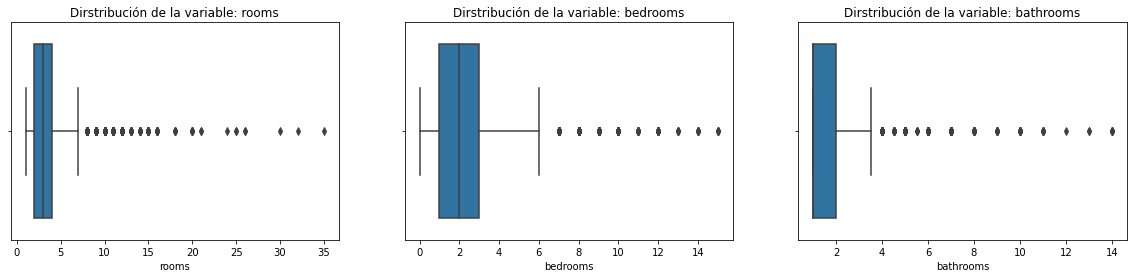

In [184]:
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(data['rooms'])
ax1.title.set_text('Dirstribución de la variable: rooms')

ax2 = plt.subplot(1,3,2)
ax2 = sns.boxplot(data['bedrooms'])
ax2.title.set_text('Dirstribución de la variable: bedrooms')

ax3 = plt.subplot(1,3,3)
ax3 = sns.boxplot(data['bathrooms'])
ax3.title.set_text('Dirstribución de la variable: bathrooms')

*En la distribución de la bariable "Rooms" podemos observar mayoria de los datos se encuentran por debajo de las 7 unidades aproximadamente, a partir de ese número se encuentran más dispersos los datos y se observan outliers, siendo el punto máximo de 35 cuartos*

*La distribución de la variable "Bedrooms" se presenta de forma similar a la variable "Rooms", los datos en su mayoria se encuentran por debajo de las 6 unidades y de ese punto en adelante se dispersan hasta un máximo de 15.*

*La distribución de la variable "Bathrooms" se encuentra en su mayoria en valores menores a 5, se pueden observar outliers hasta un máximo de 15 unidades en una propiedad lo cual puede representar un valor que afecte al modelo al no ser proporcional a los demas.*

C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


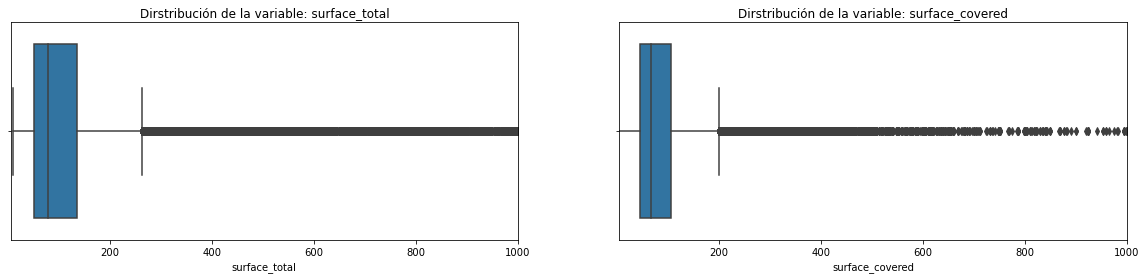

In [186]:
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(data['surface_total'])
plt.xlim(5,1000)
ax1.title.set_text('Dirstribución de la variable: surface_total')

ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(data['surface_covered'])
plt.xlim(5,1000)
ax2.title.set_text('Dirstribución de la variable: surface_covered')

*En la gráfica anterior podemos observar que la mayoría de los datos para la variable "Surface total" se encuentra por debajo de los 300 m2 aproximadamente donde llega el último cuartil, la mediana esta por debajo de los 100 m2 y el limite inferior de la caja compienza en los 50m2 aproximadamente, se puede observar que hay muchos valores outliers por encima del promedio.*

*La distribución de la variable superficie cubierta es muy similar a la de superficie total, ya que el rango del limite inferior al limite superior de la caja va de los 50 m2 a los 200 m2 aproximadamente, sin embargo la grafica empieza desde un valor cercano a 0, esto nos dice que existen valores muy pequeños los cuales pueden afectar el entrenamiento y el resultado del modelo.*

C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


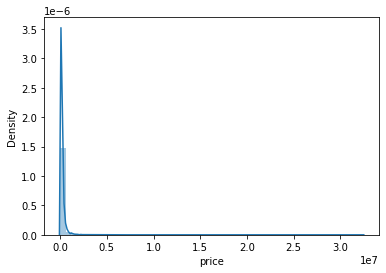

In [191]:
sns.distplot(data['price'])

*Para la distribución de la variable de precio podemos observar que no es normal se encuentra muy sesgado a la izquierda a los precios más bajos con algunos outliers que hacen que la gráfica se vea de esa manera.*

In [192]:
# Rango intercuartílico en variable Rooms
q25,q75 = np.percentile(data.rooms.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.rooms > minimo) & (data.rooms < maximo)]

# Rango intercuartílico en variable Bathrooms
q25,q75 = np.percentile(data.bathrooms.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.bathrooms >= minimo) & (data.bathrooms <= maximo)]

# Rango intercuartílico en variable Bedrooms
q25,q75 = np.percentile(data.bedrooms.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.bedrooms >= minimo) & (data.bedrooms <= maximo)]

# Rango intercuartílico en variable surface_total
q25,q75 = np.percentile(data.surface_total.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.surface_total >= minimo) & (data.surface_total <= maximo)]

# Rango intercuartílico en variable surface_covered
q25,q75 = np.percentile(data.surface_covered.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.surface_covered >= minimo) & (data.surface_covered <= maximo)]

# Rango intercuartílico en variable price
q25,q75 = np.percentile(data.price.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.price >= minimo) & (data.price <= maximo)]

C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

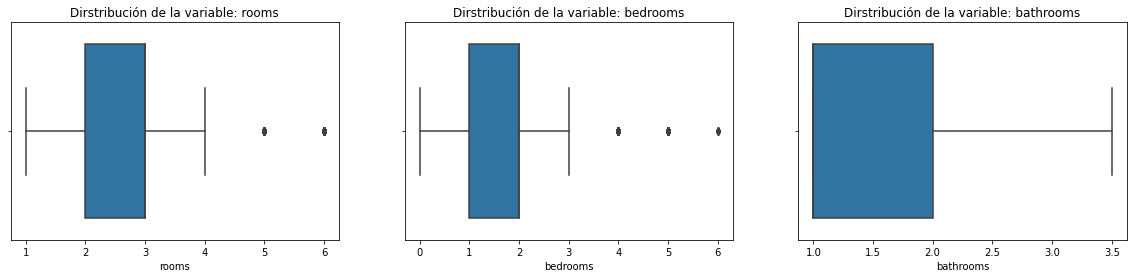

In [193]:
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(data['rooms'])
ax1.title.set_text('Dirstribución de la variable: rooms')

ax2 = plt.subplot(1,3,2)
ax2 = sns.boxplot(data['bedrooms'])
ax2.title.set_text('Dirstribución de la variable: bedrooms')

ax3 = plt.subplot(1,3,3)
ax3 = sns.boxplot(data['bathrooms'])
ax3.title.set_text('Dirstribución de la variable: bathrooms')

C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


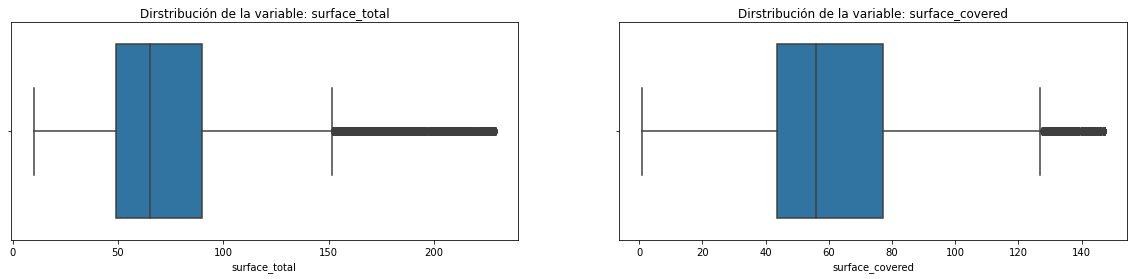

In [194]:
fig = plt.figure(figsize=(20,4))

ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(data['surface_total'])
ax1.title.set_text('Dirstribución de la variable: surface_total')

ax2 = plt.subplot(1,2,2)
ax2 = sns.boxplot(data['surface_covered'])
ax2.title.set_text('Dirstribución de la variable: surface_covered')

C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


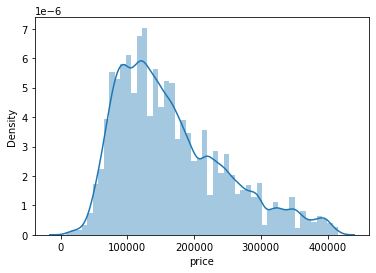

In [195]:
sns.distplot(data['price'])

In [22]:
data.shape

(114485, 19)

*Como podemos observar en las gráficas anteriores se eliminaron los outliers y quedaron los datos de forma mejor distribuida dentro del rango que veiamos en los boxplot para las variables "Surface total", "Surface covered" y "Price".*

*Para las variables "Rooms", "Bathrooms" y "Bedrooms" se pude observar una distribución mejor sin la presencia de outliers significativos.*


## PARTE B - Análisis Exploratorio de datos (EDA)

*Análisis por Ubicación y Tipo de propiedad 

Text(0, 0.5, 'Tipos de propiedad')

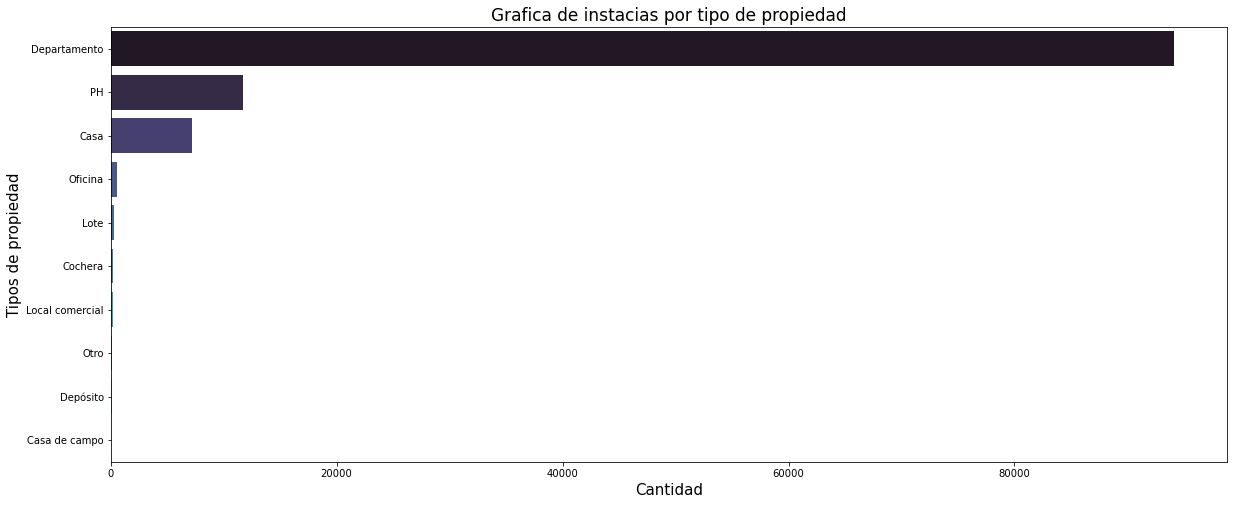

In [196]:
plt.figure(figsize=(20,8))
sns.countplot(y='property_type', data=data, order = data['property_type'].value_counts().index, palette = 'mako')
plt.title("Grafica de instacias por tipo de propiedad", fontsize=17)
plt.xlabel("Cantidad",fontsize=15)
plt.ylabel("Tipos de propiedad", fontsize=15)

*Las propiedades con mayor cantidad de publicaciones son Departamento, Casa y PH.*

Text(0, 0.5, 'Precio')

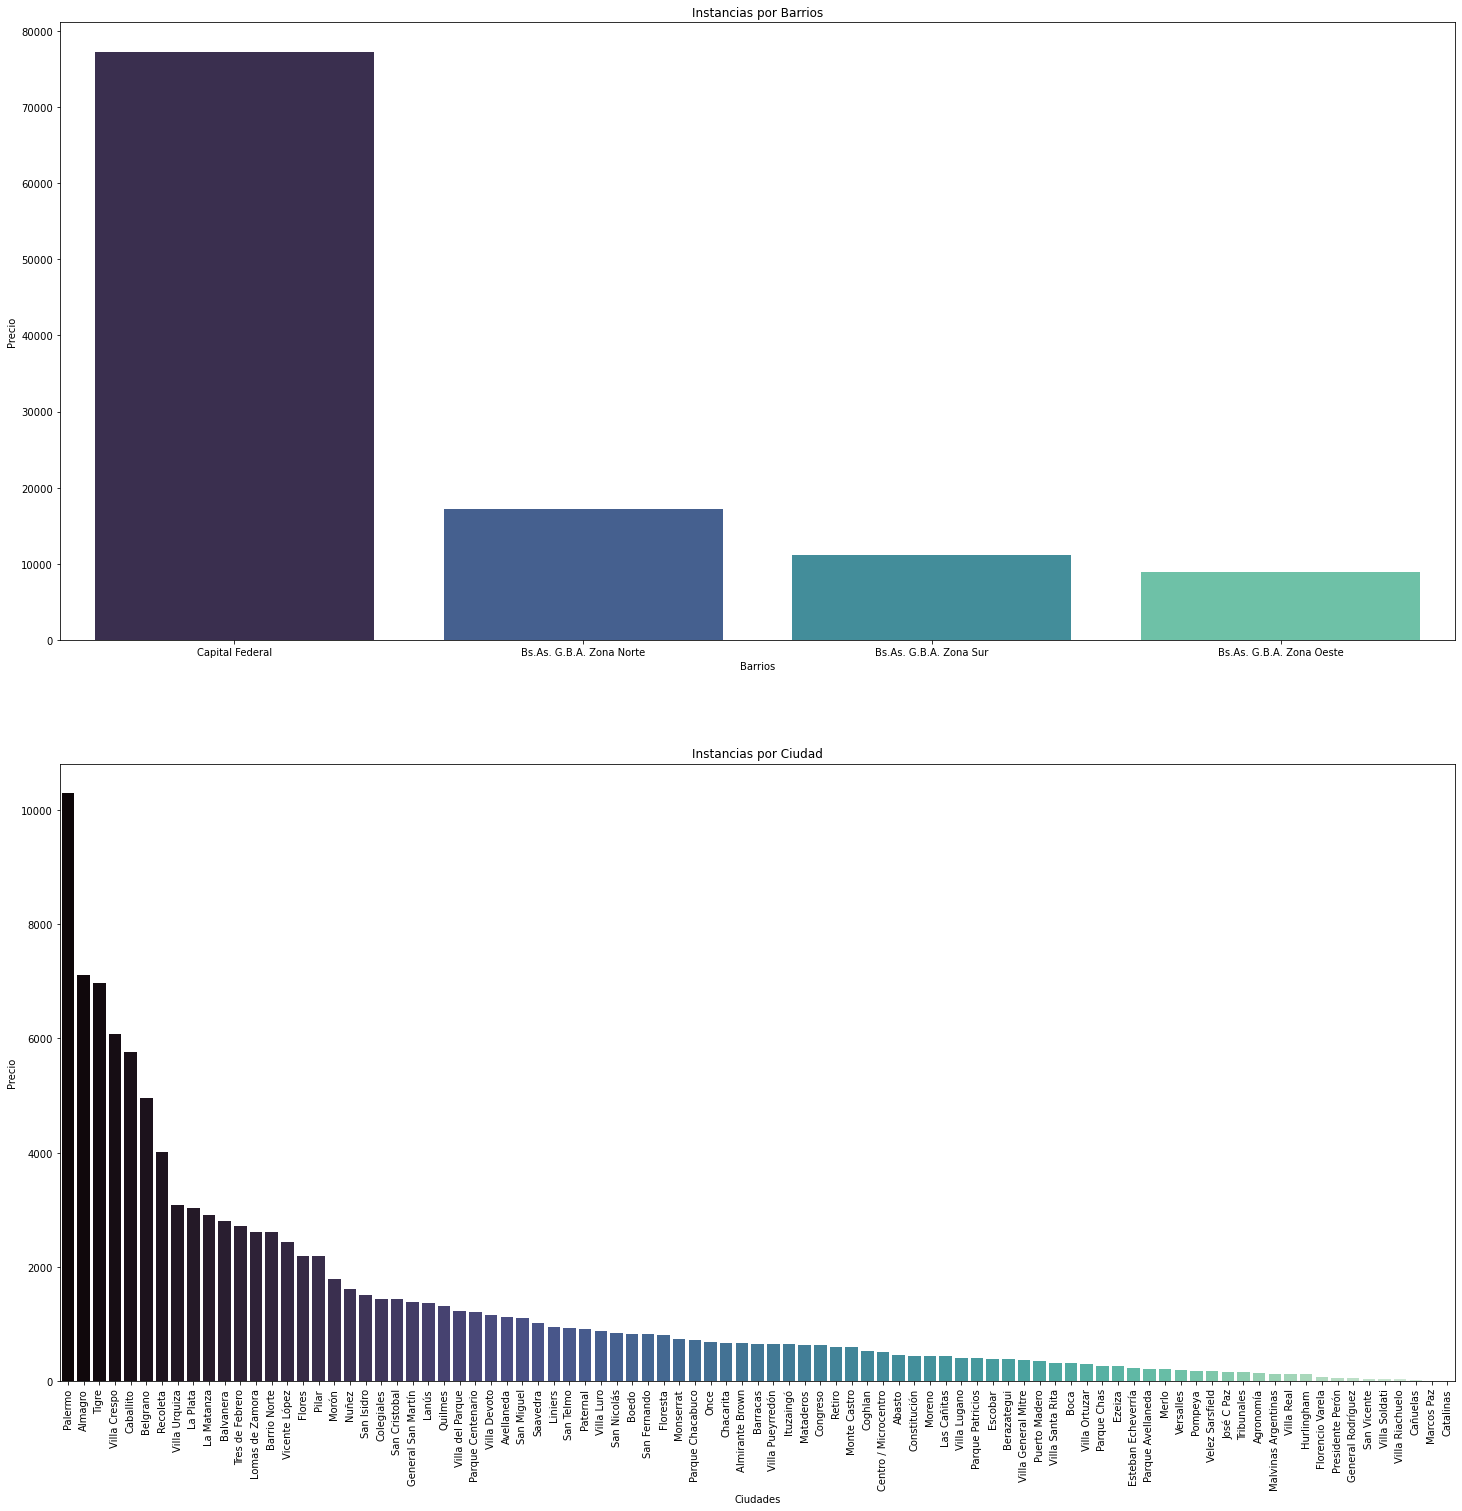

In [197]:
fig = plt.figure(figsize=(25,25))

ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(data = data, x='l2', order = data['l2'].value_counts().index, palette='mako')
ax1.title.set_text('Instancias por Barrios')
plt.xlabel('Barrios')
plt.ylabel('Precio')

ax2 = plt.subplot(2,1,2)
ax2 = sns.countplot(data = data, x='l3', order = data['l3'].value_counts().index, palette='mako')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.title.set_text('Instancias por Ciudad')
plt.xlabel('Ciudades')
plt.ylabel('Precio')

*El barrio con la mayor cantidad de propiedades publicadas es Capital Federal, mientras que las ciudades con mas publicaciones son Palermo, Tigre y Almagro.*

* Análisis mensual de publicaciones

In [198]:
#Cambio de tipo de dato a fecha
data.created_on = pd.to_datetime(data["created_on"])

In [199]:
#Agregar una columna con el numero del mes correspondiente
data["num_mes"]= data["created_on"].dt.month

In [200]:
data.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,num_mes
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,10
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,10


In [201]:
#Agrupación de los datos por mes
mensual = data.groupby("num_mes").size()

In [202]:
mensual

num_mes
1     17390
2      6706
3      7800
4      7299
5      7310
6      7505
7     13826
8      8998
9      5417
10     7852
11    17137
12     7245
dtype: int64

Text(0, 0.5, 'Cantidad')

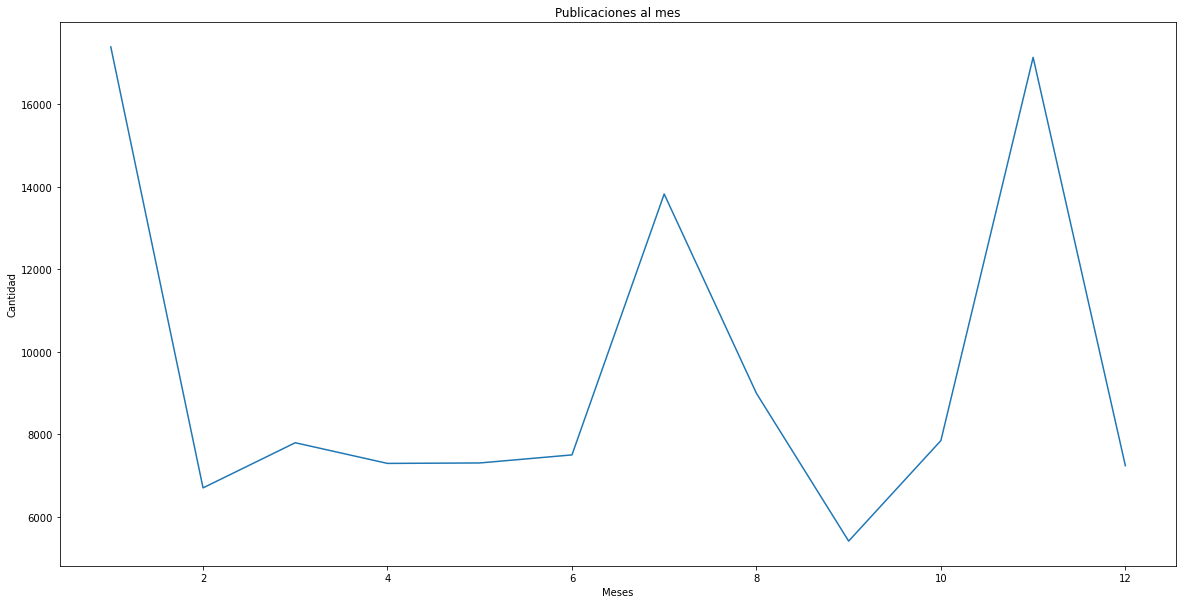

In [203]:
plt.figure(figsize = (20,10))
mensual.plot(x="num_mes")
plt.title("Publicaciones al mes")
plt.xlabel("Meses")
plt.ylabel("Cantidad")

*La mayor cantidad de anuncios de venta de inmuebles se realiza en los meses de Enero, Julio y Noviembre.*

In [204]:
#Obtener el promedio de precios
mensual_precio = data.groupby("num_mes").price.mean()

In [205]:
mensual_precio

num_mes
1     162452.862277
2     167703.578437
3     166367.074615
4     169723.736539
5     168957.383311
6     165646.425183
7     177597.015984
8     172646.224050
9     163950.175743
10    165188.780565
11    156632.681800
12    160908.481850
Name: price, dtype: float64

Text(0, 0.5, 'Precio')

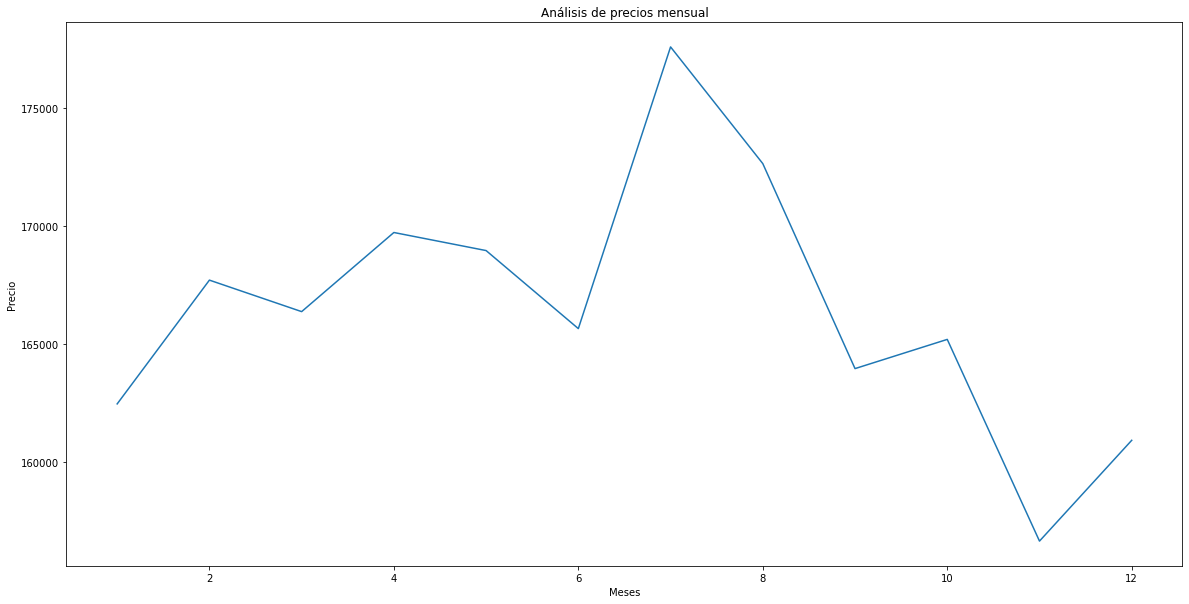

In [206]:
plt.figure(figsize = (20,10))
mensual_precio.plot(x="num_mes")
plt.title("Análisis de precios mensual")
plt.xlabel("Meses")
plt.ylabel("Precio")

*Los meses en los cuales las propiedades publicadas tienen mayor promedio de precio son en Julio y Agosto. Coincide en el mes de Julio con la mayor cantidad de anuncios publicados. Podemos concluir que las personas prefieren realizar sus anuncios de venta de inmuebles durante el verano, se puede deber al periodo vacacional ya que la gente tiene mas tiempo de realizar busquedas de propiedades, tambien coincide con el cierre semestral del calendario escolar y cierre de año.*

* Análisis por Ubicación y Precios

(0.0, 1000000.0)

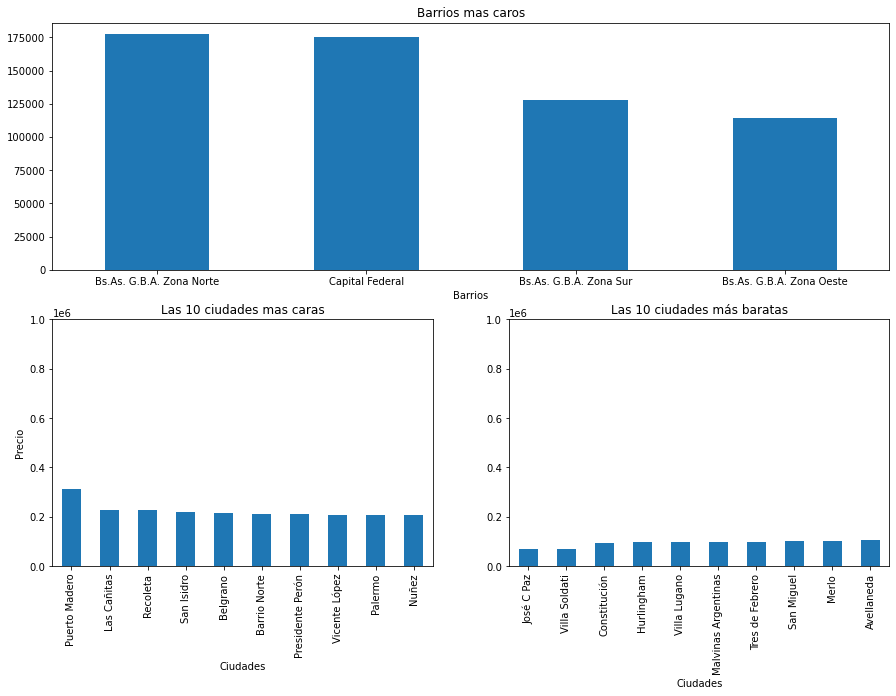

In [207]:
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(2,1,1)
ax1 = data.groupby(by='l2')['price'].mean().sort_values(ascending=False).plot(
    kind='bar',title = 'Barrios mas caros')
plt.xticks(rotation=0)
plt.xlabel('Barrios')

ax2 = plt.subplot(2,2,3)
ax2 = data.groupby(by='l3')['price'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', title = 'Las 10 ciudades mas caras')
plt.xlabel('Ciudades')
plt.ylabel('Precio')
plt.ylim(0,1000000)

ax3 = plt.subplot(2,2,4)
ax3 = data.groupby(by='l3')['price'].mean().sort_values(ascending=True).head(10).plot(
    kind='bar',title = 'Las 10 ciudades más baratas')
plt.xlabel('Ciudades')
plt.ylim(0,1000000)

In [208]:
data.groupby(["l2",'l3']).agg({"price":"mean"}).sort_values(by="price", ascending=False) 

price
l2                       l3                          
Capital Federal          Puerto Madero  313328.160563
                         Las Cañitas    227895.314351
                         Recoleta       227053.751183
Bs.As. G.B.A. Zona Norte San Isidro     221573.137954
Capital Federal          Belgrano       217283.752777
...                                               ...
                         Villa Lugano    97483.646635
Bs.As. G.B.A. Zona Oeste Hurlingham      96405.926230
Capital Federal          Constitución    92498.780000
                         Villa Soldati   71917.500000
Bs.As. G.B.A. Zona Norte José C Paz      68738.916667

[89 rows x 1 columns]

*En este análisis de precios por zona nos podemos dar cuenta de que podría haber diferencias entre predecir el precio de una propiedad en Zona Norte que en la Zona Oeste. Podemos observar que las ciudades mas caras pertenecen al barrio de Capital Federal y Zona Norte, mientras que las más baratas se encuentran en la Zona Oeste. Decidí realizar el mismo filtro que en la primera entrega, por la zona con la mayor cantidad de publicaciones realizadas y los tres tipos de propiedad más publicados. Inicialmente tenia la intención de realizar una separación por zonas para considerar como variable en el modelo, sin embargo hay ciudades dentro de las más baratas que se encuentran también en los barrios más caros y viceversa, por lo que decidí realizar este filtro por zona (Capital Federal) y hacer únicamente la separación por ciudades para evaluar su importancia para el modelo.*

In [209]:
#Se realiza el filtro por tipo de propiedad (PH, Departamento, Casa) y Ciudad Federal.
data_f = data[((data.property_type=="PH") | 
                                (data.property_type=="Departamento") | 
                                (data.property_type=="Casa")) & 
                                (data.l2=="Capital Federal")]

print(f'Filas y columnas: {data_f.shape}')

Filas y columnas: (76553, 20)


* **Correlaciones**

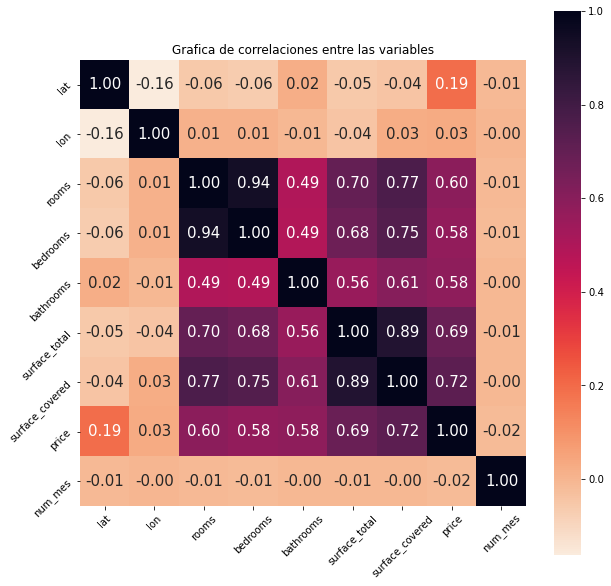

In [210]:
properati_corr = data_f.corr()
plt.figure(figsize=(10,10))
sns.heatmap(properati_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap="rocket_r")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Grafica de correlaciones entre las variables")
plt.show()

*Las variables que más se correlacionan con el precio son surface_covered, surface_total, bathrooms, bedrooms y rooms.*

* **One Hot Encoding**

In [38]:
#One hot encoding para las columnas tipo de propiedad y ciudad
data_ohe = pd.get_dummies(data_f, columns=['property_type','l3'])

In [39]:
data_ohe.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bedrooms,bathrooms,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,2.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data_ohe.shape

(76553, 78)

* **Eliminar columnas innecesarias**

In [41]:
df = data_ohe.drop(['currency','title','description','l1','l2','start_date','end_date','lat','lon','operation_type','created_on'],axis=1)
df

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,num_mes,property_type_Casa,property_type_Departamento,property_type_PH,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,2.0,1.0,2.0,70.0,58.0,159000.0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,1.0,45.0,45.0,125000.0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,1.0,85.0,50.0,295000.0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,1.0,56.0,56.0,150000.0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2.0,1.0,1.0,70.0,70.0,159500.0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146542,2.0,1.0,1.0,80.0,80.0,170000.0,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
146543,3.0,2.0,2.0,85.0,81.0,225000.0,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
146545,3.0,2.0,2.0,88.0,82.0,399000.0,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
146549,3.0,2.0,1.0,84.0,84.0,178000.0,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76553 entries, 1 to 146550
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rooms                       76553 non-null  float64
 1   bedrooms                    76553 non-null  float64
 2   bathrooms                   76553 non-null  float64
 3   surface_total               76553 non-null  float64
 4   surface_covered             76553 non-null  float64
 5   price                       76553 non-null  float64
 6   num_mes                     76553 non-null  int64  
 7   property_type_Casa          76553 non-null  uint8  
 8   property_type_Departamento  76553 non-null  uint8  
 9   property_type_PH            76553 non-null  uint8  
 10  l3_Abasto                   76553 non-null  uint8  
 11  l3_Agronomía                76553 non-null  uint8  
 12  l3_Almagro                  76553 non-null  uint8  
 13  l3_Balvanera                76

* **MinMaxScaler**

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
#Asignar escalados
scaler = MinMaxScaler()

In [45]:
#Fit transform
transformed_df = scaler.fit_transform(df.iloc[:, :111])

In [46]:
transformed_df

array([[0.2       , 0.16666667, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4       , 0.33333333, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.33333333, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [47]:
#Cambiar a dataframe
transformed_df = pd.DataFrame(transformed_df)

In [48]:
transformed_df

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0.2,0.166667,0.4,0.273973,0.390411,0.370713,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.166667,0.0,0.159817,0.301370,0.287517,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.166667,0.0,0.342466,0.335616,0.703498,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.166667,0.0,0.210046,0.376712,0.348690,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.166667,0.0,0.273973,0.472603,0.371936,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76548,0.2,0.166667,0.0,0.319635,0.541096,0.397629,0.545455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76549,0.4,0.333333,0.4,0.342466,0.547945,0.532212,0.545455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76550,0.4,0.333333,0.4,0.356164,0.554795,0.957981,0.545455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76551,0.4,0.333333,0.0,0.337900,0.568493,0.417205,0.545455,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Cambiar el nombre de la columnas con el original
transformed_df.columns = df.columns

In [50]:
transformed_df

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,num_mes,property_type_Casa,property_type_Departamento,property_type_PH,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,0.2,0.166667,0.4,0.273973,0.390411,0.370713,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.166667,0.0,0.159817,0.301370,0.287517,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.166667,0.0,0.342466,0.335616,0.703498,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.166667,0.0,0.210046,0.376712,0.348690,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.166667,0.0,0.273973,0.472603,0.371936,0.818182,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76548,0.2,0.166667,0.0,0.319635,0.541096,0.397629,0.545455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76549,0.4,0.333333,0.4,0.342466,0.547945,0.532212,0.545455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76550,0.4,0.333333,0.4,0.356164,0.554795,0.957981,0.545455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76551,0.4,0.333333,0.0,0.337900,0.568493,0.417205,0.545455,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


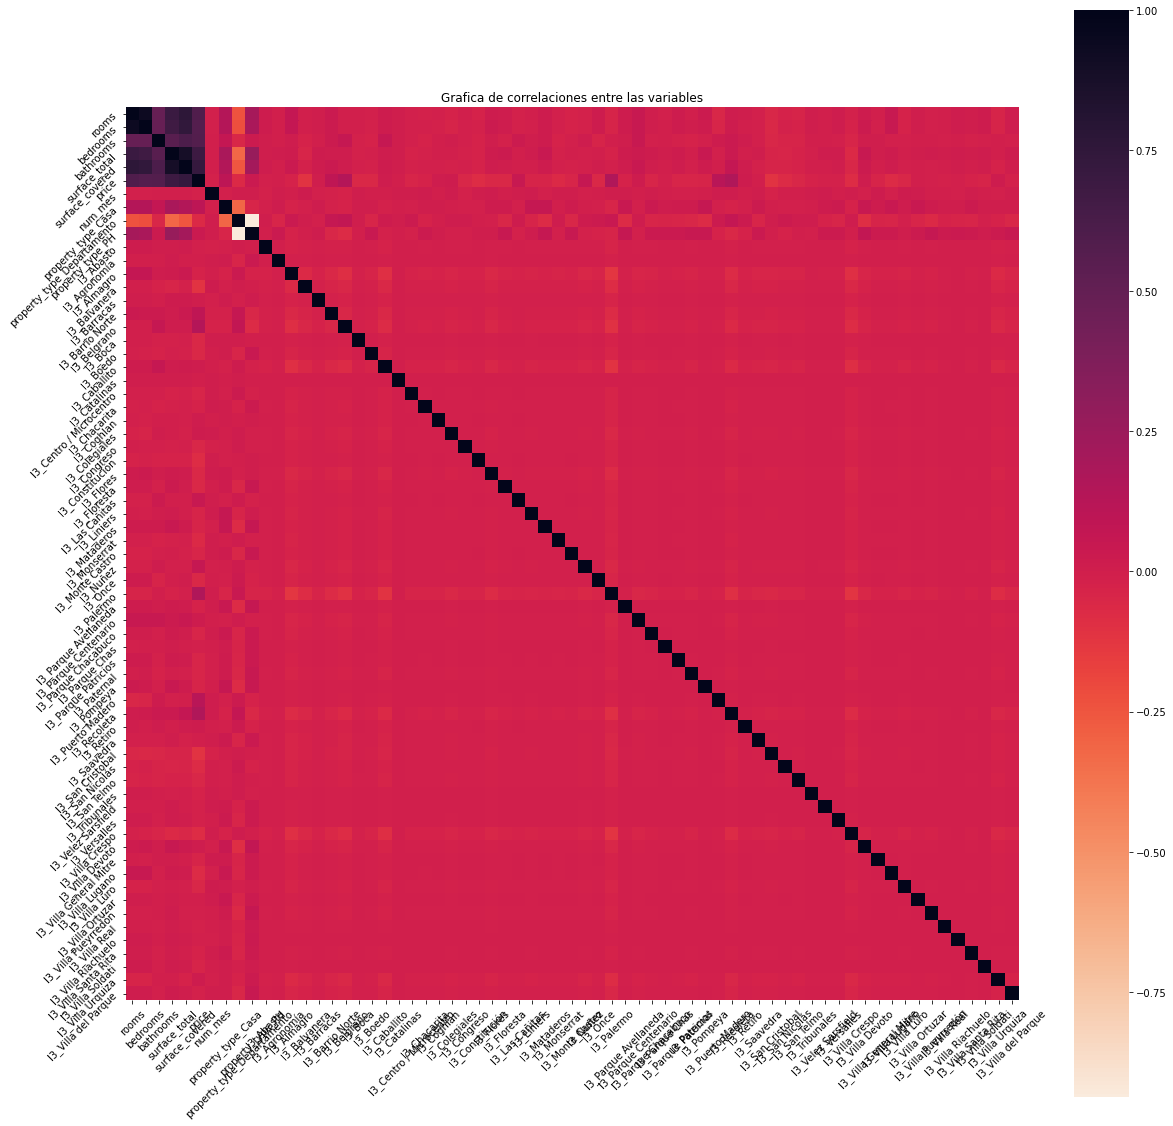

In [81]:
transformed_corr = transformed_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(transformed_corr, cbar = True,  square = True, fmt= '.2f', cmap="rocket_r")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Grafica de correlaciones entre las variables")
plt.show()

*En la gráfica de correlación de todas las columnas observamos que las que más se correlacionan con la variable price son las mismas que anteriormente habiamos identificado, sin embargo hay otras columnas nuevas de las ciudades que si bien no tienen una relación importante si se acercan, lo podemos ver en el cambio de los colores.*

#### Entrenamiento Modelo: Árbol de decisión (Modelo implementado en la Entrega 01) ###

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [85]:
X = transformed_df.drop(['price'], axis=1)
y = transformed_df.price

In [86]:
X

,rooms,bedrooms,bathrooms,surface_total,surface_covered,num_mes,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,0.2,0.166667,0.4,0.273973,0.390411,0.818182,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.166667,0.0,0.159817,0.301370,0.818182,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.166667,0.0,0.342466,0.335616,0.818182,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.166667,0.0,0.210046,0.376712,0.818182,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.166667,0.0,0.273973,0.472603,0.818182,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76548,0.2,0.166667,0.0,0.319635,0.541096,0.545455,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76549,0.4,0.333333,0.4,0.342466,0.547945,0.545455,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76550,0.4,0.333333,0.4,0.356164,0.554795,0.545455,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76551,0.4,0.333333,0.0,0.337900,0.568493,0.545455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
y

0        0.370713
1        0.287517
2        0.703498
3        0.348690
4        0.371936
           ...   
76548    0.397629
76549    0.532212
76550    0.957981
76551    0.417205
76552    0.710839
Name: price, Length: 76553, dtype: float64

In [88]:
tree_regressor = DecisionTreeRegressor

In [89]:
# Se separa 'x' y 'y' en X_train y y_train para un 70% de entrenamiento y 30% para evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53587, 66) (22966, 66) (53587,) (22966,)


In [90]:
scores_train = []
scores_test = []
profundidades = np.arange(1,50)
for max_depth in profundidades:
    clf = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    scores_train.append(r2_score(y_train, y_pred_train))
    scores_test.append(r2_score(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

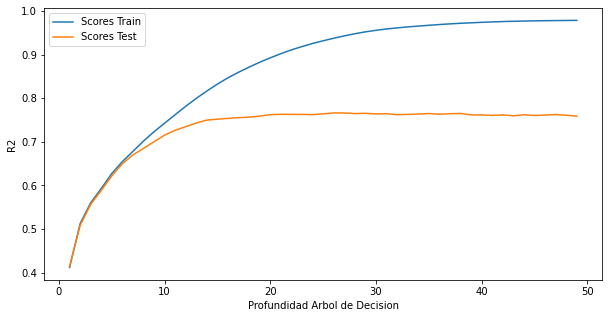

In [91]:
plt.figure(figsize=(10,5))
plt.plot(profundidades,scores_train, label = 'Scores Train')
plt.plot(profundidades,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('R2')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [92]:
tree_regressor = DecisionTreeRegressor(max_depth=20, random_state=42)

# Entrenar modelo
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [93]:
y_train_pred = tree_regressor.predict(X_train)

In [94]:
y_test_pred = tree_regressor.predict(X_test)

In [95]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 en Train: {r2_train}')
print(f'R2 en Test: {r2_test}')

R2 en Train: 0.8925112382965379
R2 en Test: 0.7621934675305339


**Resultados obtenidos en el modelo Árbol de Decisión Entrega 01:**

* R2 en Train: 0.8925112382965379
* R2 en Test: 0.7621934675305339

#### Entrenamiento Modelo: Random Forest (Modelo implementado en la Entrega 02) 

In [96]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [97]:
# Grilla para Grid Search
param_grid = {"n_estimators":[10,50,100],
              'max_depth': range(2,25),
              "max_features":["sqrt", "log2"],
              "min_samples_split":[2,4,8],
             }

In [98]:
model_rfr = RandomForestRegressor()

In [99]:
grid_rfr = GridSearchCV(model_rfr, param_grid, n_jobs=-1, cv=5)

In [100]:
# Entrenamos: Random Forest con la grilla definida arriba 
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 25),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100]})

In [101]:
#Obtener el mejor resultado
grid_rfr.best_score_ , grid_rfr.best_params_

(0.8210387787387591,
 {'max_depth': 24,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 100})

In [102]:
grid_rfr.best_estimator_

RandomForestRegressor(max_depth=24, max_features='sqrt')

Este árbol elegido corresponde a una profundidad de la mitad de el elegido como el mejor resultado, por lo que su desempeño cambia y se reduce en un 6%.

In [105]:
#Definir el modelo con los hiperparámetros obtenidos
rf = RandomForestRegressor(n_estimators= 100, max_depth=24, max_features='sqrt', min_samples_split=2,)

In [106]:
#Entrenar modelo
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=24, max_features='sqrt')

In [107]:
#Obtener la importancia de las variables
rf.feature_importances_

array([9.34860602e-02, 8.89645161e-02, 1.10977037e-01, 2.66166387e-01,
       2.28002026e-01, 2.59037017e-02, 2.43265719e-03, 6.33665621e-03,
       6.94158419e-03, 3.61551010e-04, 8.81971837e-05, 3.16984221e-03,
       6.34029510e-03, 1.07439508e-03, 6.95366112e-03, 1.86524790e-02,
       1.22304120e-03, 8.60855164e-04, 2.21158800e-03, 2.48644131e-07,
       5.13831429e-04, 5.88778565e-04, 5.71054496e-04, 1.75714145e-03,
       1.17766192e-03, 2.35660189e-03, 3.22382027e-03, 1.86892455e-03,
       3.03506546e-03, 1.00375889e-03, 1.57923547e-03, 1.54279471e-03,
       5.71525301e-04, 5.84812531e-03, 1.79839596e-03, 3.41747324e-02,
       6.62593312e-04, 5.38776359e-04, 8.16498689e-04, 2.73142534e-04,
       5.96272438e-04, 8.56930036e-04, 9.57290611e-04, 1.63256205e-02,
       2.08636321e-02, 1.21570935e-03, 8.86564141e-04, 4.65284617e-03,
       1.39396582e-03, 6.74548810e-04, 1.98774835e-04, 1.81219917e-04,
       1.07677600e-04, 2.29470108e-03, 6.30775085e-04, 6.17730621e-04,
      

C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


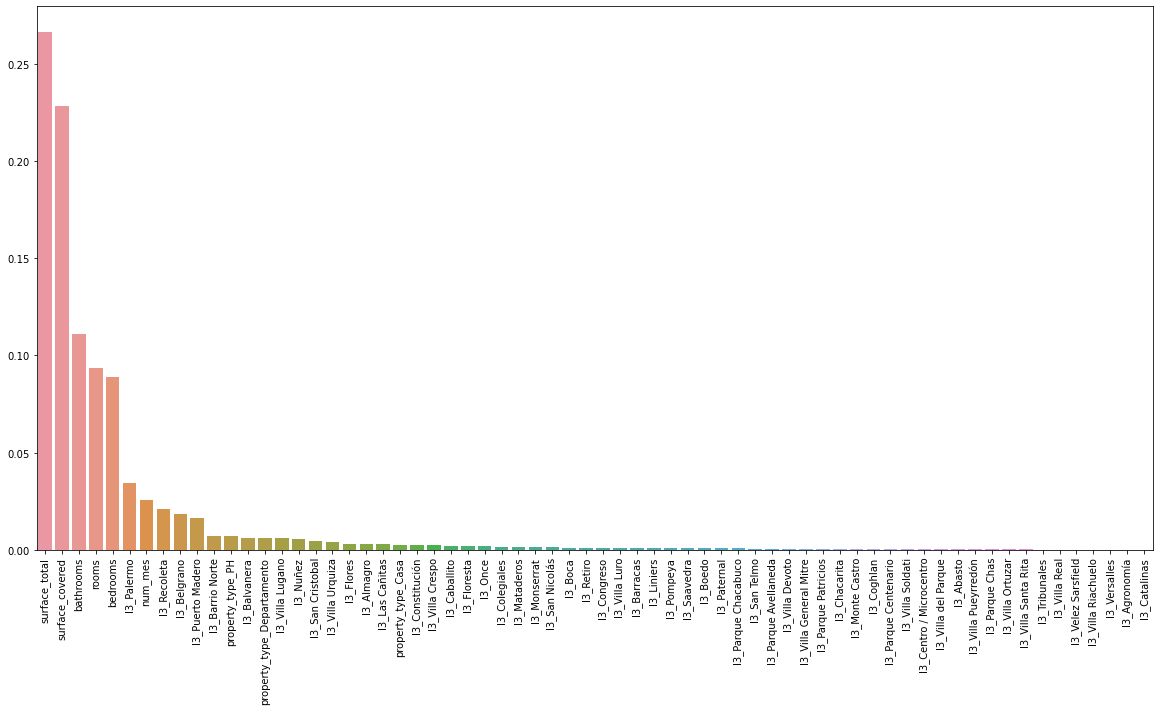

In [116]:
importances = rf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (20,10))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation = 90)
plt.tick_params(labelsize=10)
plt.show()


Como se puede observar en la gráfica, la variable de mayor importancia en el modelo es surface_total, seguida de suface_covered y bathrooms. 

In [117]:
#Predecir
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [118]:
#evaluar modelo con r2
print(metrics.r2_score(y_train, y_train_pred))
print(metrics.r2_score(y_test, y_test_pred))

0.900572622983193
0.8237855144238146


Podemos observar que el desempeño de este modelo con Random Forest es menor al que obtuvimos previamente con árboles de decisión.

#### Validación cruzada

In [119]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [120]:
scores = cross_validate(rf, X, y, cv=5, scoring='r2', return_train_score=True)

In [121]:
print(scores['train_score'])

[0.89576845 0.897149   0.8984825  0.90528046 0.89930439]


In [122]:
print(scores['test_score'])

[0.83237481 0.83081933 0.82144935 0.79172126 0.81197735]


In [123]:
train_r2 = []
test_r2 = []

N_estimadores = [1,25,50,100,150,200,250,300]
for estimadores in N_estimadores:
    print(estimadores)
    rf = RandomForestRegressor(n_estimators= estimadores, max_depth=14, max_features='log2', min_samples_split=2,)
    rf.fit(X_train,y_train)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    train_r2.append(metrics.r2_score(y_train, y_train_pred))
    test_r2.append(metrics.r2_score(y_test, y_test_pred))
    
train_r2 = np.array(train_r2)
test_r2 = np.array(test_r2)

1
25
50
100
150
200
250
300


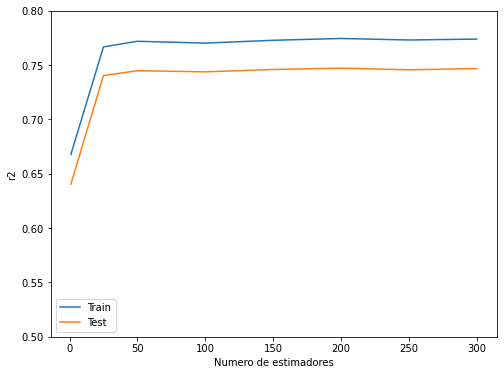

In [124]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_r2, label = 'Train')
plt.plot(N_estimadores, test_r2, label = 'Test')
plt.xlabel('Numero de estimadores')
plt.ylabel('r2')
plt.legend()
plt.ylim(0.50,0.8)
plt.show()

Podemos observar en la gráfica anterior que el score que muestra sobre el conjunto de test y train mantiene una distancia contante sin mostrar un sobreajuste a lo largo de los estimadores. 

In [125]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,30,1)

for profundidad in profundidades:
    rf = RandomForestRegressor(n_estimators= 100, max_depth= profundidad, max_features='log2', min_samples_split=2,)
    scores = cross_validate(rf, X, y, cv=5, scoring='r2', return_train_score=True)
    
    tree_train_scores_mean.append(scores['train_score'].mean())
    tree_train_scores_std.append(scores['train_score'].std())
    
    tree_test_scores_mean.append(scores['test_score'].mean())
    tree_test_scores_std.append(scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

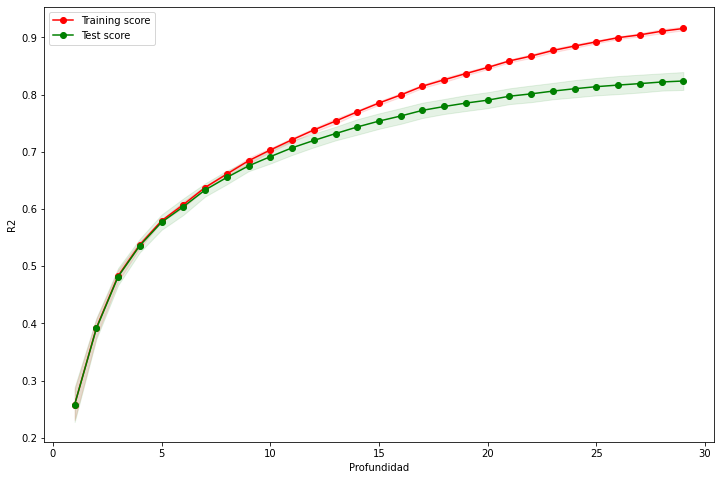

In [126]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('R2')
plt.xlabel('Profundidad')
plt.show()

Al graficar la curva de validación aplicando validación cruzada con la profundidad de Random Forest podemos observar que el nivel de profundidad que elegimos en el modelo (14), es la apropiada, ya que mantiene una distancia apropiada el score de test contra el train que permite que no este demasiado alejada ni que se produzca un sobreajuste en los datos, a partir de este nivel de profundidad la distancia entre los dos scores se mantiene constante.  

Al utilizar Random Forest con la busqueda de hiperparámetros por Grid Search pude observar como cambió el hiperparámetro de la profundidad al hacerlo más preciso y al tener la capacidad de evaluar diversas combinaciones a la ves, se puede optimizar al probar mayores combinaciones de hiperparámetros. También se puedo observar mediante gráficas y resultados que la variable de mayor importancia en el modelo es surface_total, seguida de suface_covered y bathrooms, dichos resultados coinciden con la gráfica de correlación que muestra el mismo órden en las variables. Esperaba que el resultado fuera mejor que el de el primer árbol de decisión entrenado, sin embargo hay cosas que aún se puede mejorar del Random Forest como la busqueda de otros hiperparámetros.

### XGBoost

In [127]:
!pip install xgboost

In [128]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [130]:
xgbr = XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [131]:
# fit the model with train data
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [132]:
#After training the model, we'll check the model training score.
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.8377523848499171


In [133]:
#We can also apply the cross-validation method to evaluate the training score.
cv_score = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % cv_score.mean())

Mean cross-validation score: 0.81


In [134]:
y_pred = xgbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2: %.2f" % r2)

r2: 0.81


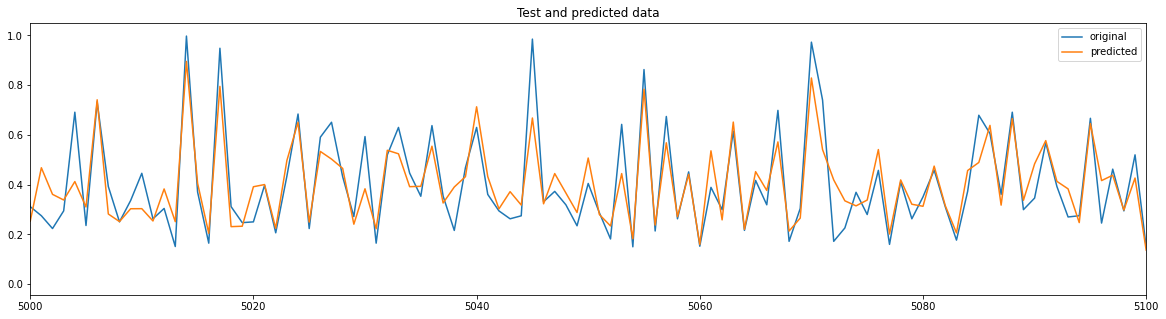

In [135]:
plt.figure(figsize=(20,5))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.xlim(5000,5100)
plt.legend()
plt.show()


*En la gráfica anterior podemos observar el comportamiento de los datos originales contra los predichos, los cuales siguen la misma linea o tendencia por lo que podemos concluir que el modelo es bueno, el modelo tiene un desempeño bastante satisfactorio, ya que el score r2 es del 81%, mejor que el del modelo entrenado en la entrega anterior, el cual fué de 67%.*

#### Modelo nuevo Entrega Final: Light GBM

In [136]:
import lightgbm as lgb

In [137]:
lgbm = lgb.LGBMRegressor(max_depth=20)
lgbm.fit(X_train, y_train)

LGBMRegressor(max_depth=20)

In [141]:
y_train_pred_lgbm = lgbm.predict(X_train)
y_test_pred_lgbm = lgbm.predict(X_test)

In [147]:
#Evaluamos el modelo 
r2_train_lgbm = r2_score(y_train, y_train_pred_lgbm)
r2_test_lgbm = r2_score(y_test, y_test_pred_lgbm)

In [156]:
print("% r2 en train:", r2_train_lgbm)
print("% r2 en test", r2_test_lgbm)

% r2 en train: 0.7981375301024554
% r2 en test 0.7896755176577256


*El resultado de este modelo (Light GBM) es de menor desempeño que XG Boost en un 9% aproximadamente, sin embargo la diferencia entre la prueba en test y en train es mínima por lo que considero que tiene un buen desempeño.*

### Comparación de modelos

In [153]:
RandomForestR = RandomForestRegressor(n_estimators= 100, max_depth=24, max_features='sqrt', min_samples_split=2,)
XGBoostR = XGBRegressor(verbosity=0) 
lgbm = lgb.LGBMRegressor(max_depth=20)

# Entrenar modelo
RandomForestR.fit(X_train, y_train)
XGBoostR.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

LGBMRegressor(max_depth=20)

Modelo inicial : Random Forest
R2 en Train: 0.9001060816442205
R2 en Test: 0.827097722482552


C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


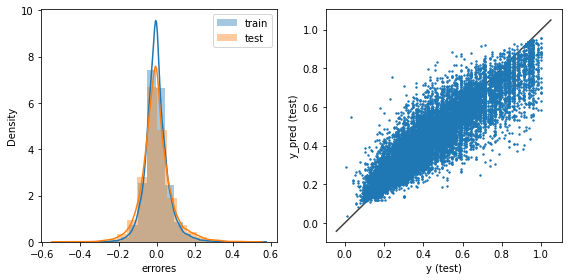

Modelo inicial : XGBoost
R2 en Train: 0.8377523848499171
R2 en Test: 0.8099245863176315


C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


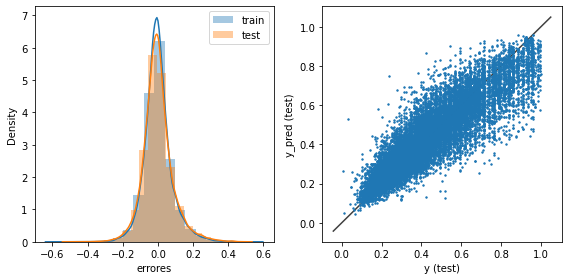

Modelo inicial : lgbm
R2 en Train: 0.7981375301024554
R2 en Test: 0.7896755176577256


C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amorg\miniconda3\envs\ds-online-40\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


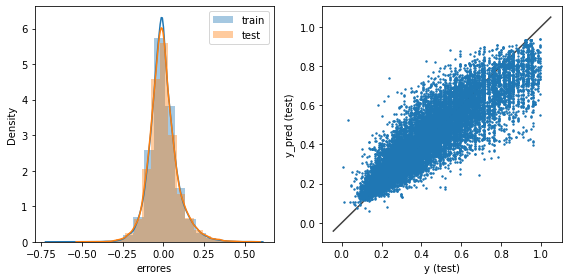

In [154]:
modelos = ['Random Forest', 'XGBoost', 'lgbm']

for i, model in enumerate([RandomForestR, XGBoostR, lgbm]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo inicial : {modelos[i]}')

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R2 en Train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Evaluación de resultados**

**-Resultados obtenidos en la entrega 02:**

**Random Forest (optimizado):**

* R2 en Train: 0.7656208442692971  
* R2 en Test: 0.6926425248479815

**XGBoost**
* R2 en Train: 0.7217363299044369
* R2 en Test: 0.6716832605647225

**-Resultados obtenidos en la entrega 04:**

**Random Forest (optimizado):**

* R2 en Train: 0.9001060816442205
* R2 en Test: 0.827097722482552

**XGBoost**
* R2 en Train: 0.8377523848499171
* R2 en Test: 0.8099245863176315

**Light GBM**
* R2 en Train: 0.7981375301024554
* R2 en Test: 0.7896755176577256

## Parte C - Interpretación de los modelos
### Conclusión Proyecto Final

* *En ambos modelos (Random Forest y XGBoost) se mejoró el desempeño de los modelos, esto se logró al incluir varias herrmamientas al preprocesamiento de los datos, como la imputación de datos, el escalado de datos y al agregar más atributos. En Random Forest el desempeño mejoró en un 13% aproximadamente, mientras que en XGBoost hubo una mejora del 10% estimado. En el nuevo modelo (Light GMB) el desempeñó fue menor que en los dos realizados anteriormente, sin embargo la diferencia entre los errores en train y el error en test de los tres modelos es muy baja, por lo que se conluye que los resultados son satisfactorios.*

* Distribución de los errores: *Respecto a los errores identificados, podemos observar en la gráfica de dispersión que en los tres modelos, los errores son mayores, es decir que se van seprando y dispersando por la gráfica, cuando el precio de las propiedades es mayor, mientras que acierta cuando el precio es menor, esto podría deberse a que existe menor cantidad de registros (como se puede observar en la gráfica de distribución de la variable "price") con precios altos para que el modelo pueda aprender de los datos adecuadamente.*

**Mejoras e implementaciones respecto a la entrega 01 y 02:**

*Para este último proyecto realicé algunas mejoras a los modelos finales entregadas en el proyecto 2, una de ellas fue en la transformación de datos, en la entrega anterior únicamente se eliminaban los datos faltantes, mientras que en esta ocasión apliqué una Imputación de valores fatantes mediante **KNN Imputer**.* 

*También se continúa el análisis exploratorio de datos, se formula una nueva pregunta para explorar: **Análisis mensual de publicaciones**, en la cual se indaga sobre la cantidad de publicaciones realizadas a lo largo de los meses y se concluye que la temporada en la cual se realiza la mayor cantidad de anuncios con los precios más altos de las propiedades, es durante el verano, esta información es bastante útil para los usuarios que planean realizar una venta y desean saber el periodo más adecuado para hacerlo.*

*Se agrega también como parte del preprocesamiento de los datos nuevas variables mediante **One Hot Encoding**, en las cuales se separa cada registro por ciudades y se evalua su impacto mediante **XGBoost (feature importances)** y gráficos de correlación, se idientifican ciertas ciudades que presentan importancia pero no llegan a ser tan reelevantes como las elegidas inicialmente, sin embargo si decidí considerar todas las columnas para entrenar el modelo.*

*Se realiza un escalado de datos con MInMaxScaler, el cual es el más adecuado para los datos ya que realiza un escalador de 0 a 1 para todas las columnas.*

*Se implementa un nuevo modelo: **Light GBM**, que trabaja con mejora de gradientes y utiliza un algoritmo de aprendizaje basado en árboles,  se evaluó y comparó su resultado contra los otros dos modelos generados.*